## INFO 4120 Python - Midterm Project - Report

#### This report will go through: 
- Executive Summary 
- Research Questions 
- The Data
    - Import Packages
    - Data Source
    - Read in Data
    - Merge, Recoding, Create Bins
    - Check Null Value
    - Word Description
    - Save File as csv
- Data Exploration
    - For Continuous Variables
    - For Categorical Variables
    - Summaries
    - Discussion
    - Explore the Questions
- Conclusion

## EXECUTIVE SUMMARY
The datasets are the food server of a restaurant recorded data about the payer, orders and tips given to the waiter. It contains payer characteristics, order details and billing information. We setted up 3 research questions, analyzed both quantitative and qualitative variables, and derived the factors that affect the amount and tip rate. We came to the conclusion that payer's gender affacts the tip rate, Saturday and Sunday are some peak spending periods that deserve attention, and the higher the total amount, the lower the tip rates .

## RESEARCH QUESTIONS
1. Whether certain characteristics of the payer affect the tip rate？
2. Which day and time has the highest total bill, and which has the highest tip rate? Are they the same?
3. How's size of people dining affact the tip rate? Does the size of people dining really has an affact the tip rate?

## THE DATA

### Import Packages

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
%matplotlib inline
os.getcwd()

'C:\\Users\\Yue Wang\\Desktop\\INFO 4120 Python\\Assign\\Midterm'

### Data Source
The datasets are downloaded from kaggle.\
It's the data of the food server of a restaurant recorded data about the tips given to the waiter. \
https://www.kaggle.com/datasets/rupakroy/waiter-tips-dataset-for-prediction/discussion

### Read in Original Datasets

In [5]:
bill = pd.read_csv("waiter_tips_bill.csv")
df1 = DataFrame(bill)
df1.head()

,record id,total_bill,tip
0,1,16.99,1.01
1,2,10.34,1.66
2,3,21.01,3.50
3,4,23.68,3.31
4,5,24.59,3.61


In [6]:
order = pd.read_csv("waiter_tips_order.csv")
df2 = DataFrame(order)
df2.head()

,record id,day,time,size
0,1,Sun,Dinner,2
1,2,Sun,Dinner,3
2,3,Sun,Dinner,3
3,4,Sun,Dinner,2
4,5,Sun,Dinner,4


In [7]:
person = pd.read_csv("waiter_tips_person.csv")
df3 = DataFrame(person)
df3.head()

,record id,sex,smoker
0,1,Female,0
1,2,Male,0
2,3,Male,0
3,4,Male,0
4,5,Female,0


### Merge and Other Adjustments

In [8]:
# Merge the Datasets
df0 = pd.merge(df1, df2, on = "record id")
Finaldf = pd.merge(df0, df3, on = "record id")
# Change Index
Finaldf= Finaldf.set_index('record id')
#Reorder the Columns
Finaldf = Finaldf[['sex','smoker','day','time','size','total_bill','tip']]

### Recoding Data
Recode the smoker column to 'Yes' if the original value is 1 and to 'No' if the original value is 0. View the top 5 rows.

In [9]:
Finaldf.smoker = Finaldf.smoker.replace(to_replace=[1,0], value =['Yes','No'])
Finaldf.head()

,sex,smoker,day,time,size,total_bill,tip
record id,,,,,,,
1,Female,No,Sun,Dinner,2,16.99,1.01
2,Male,No,Sun,Dinner,3,10.34,1.66
3,Male,No,Sun,Dinner,3,21.01,3.50
4,Male,No,Sun,Dinner,2,23.68,3.31
5,Female,No,Sun,Dinner,4,24.59,3.61


### Create Bins
Create bins for total_bill. Total bills between [0,15) are Low. Total bills between [15,30) are Medium. Total bills between [30,60) are high. \
The sum of bills of all 3 levels equals to 244, which means all the records are included.

In [10]:
total = pd.cut(Finaldf['total_bill'], [0,15,30,60], right = False, labels = ['Low','Med','High'])
pd.value_counts(total)

Med     132
Low      80
High     32
Name: total_bill, dtype: int64

### Create New Column

In [11]:
Finaldf.eval('tip_rate = (tip/total_bill)*100', inplace = True)
Finaldf.head()

,sex,smoker,day,time,size,total_bill,tip,tip_rate
record id,,,,,,,,
1,Female,No,Sun,Dinner,2,16.99,1.01,5.944673
2,Male,No,Sun,Dinner,3,10.34,1.66,16.054159
3,Male,No,Sun,Dinner,3,21.01,3.50,16.658734
4,Male,No,Sun,Dinner,2,23.68,3.31,13.978041
5,Female,No,Sun,Dinner,4,24.59,3.61,14.680765


### Check If Null Values Exist
There's no null value in the dataset.

In [12]:
Finaldf.isnull().values.any()

False

### View the Final Dataset & Word Descriptins
record ID: each record has a unique id \
total_bill: Total bill in dollars including taxes\
tip: Tip given to waiters in dollars e.g. 1.01, 1.66 \
sex: gender of the person paying the bill  \ 
smoker: whether the person smoked or not, if the person smoke, show Yes, if not, shows No \
day: day of the week \
time: lunch or dinner \
size: number of people in a table

View the top 10 rows of the final dataset.

In [13]:
#View the data types
Finaldf.dtypes

sex            object
smoker         object
day            object
time           object
size            int64
total_bill    float64
tip           float64
tip_rate      float64
dtype: object

In [14]:
# Example of the data
Finaldf.iloc[0:1,0:8]

,sex,smoker,day,time,size,total_bill,tip,tip_rate
record id,,,,,,,,
1,Female,No,Sun,Dinner,2,16.99,1.01,5.944673


In [15]:
Finaldf.head(10)

,sex,smoker,day,time,size,total_bill,tip,tip_rate
record id,,,,,,,,
1,Female,No,Sun,Dinner,2,16.99,1.01,5.944673
2,Male,No,Sun,Dinner,3,10.34,1.66,16.054159
3,Male,No,Sun,Dinner,3,21.01,3.50,16.658734
4,Male,No,Sun,Dinner,2,23.68,3.31,13.978041
5,Female,No,Sun,Dinner,4,24.59,3.61,14.680765
6,Male,No,Sun,Dinner,4,25.29,4.71,18.623962
7,Male,No,Sun,Dinner,2,8.77,2.00,22.805017
8,Male,No,Sun,Dinner,4,26.88,3.12,11.607143
9,Male,No,Sun,Dinner,2,15.04,1.96,13.031915


### Save Data as csv File

In [16]:
Finaldf.to_csv("final version file.csv")

## DATA EXPLORATION

### For Continuous Variables

#### Analysis of Size

In [17]:
# Descriptive Analysis of 'size'
Finaldf['size'].describe()

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

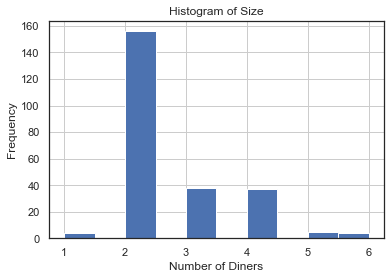

In [85]:
# Histogram of 'size'
Finaldf.hist('size')
plt.title('Histogram of Size')
plt.xlabel('Number of Diners')
plt.ylabel('Frequency')
plt.show()

#### Conclusion:
Most customers come to dine for two people, followed by three or four people, a single person or people more than 4 dining situation is very rare.

#### Analysis of Total Bill

In [19]:
# Descriptive Analysis of 'total_bill'
Finaldf['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

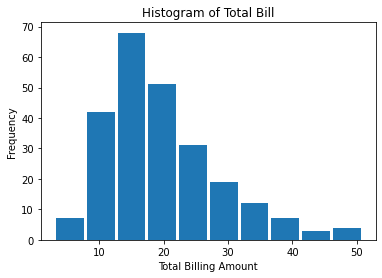

In [20]:
# Histogram of 'total_bill'
plt.hist(Finaldf.total_bill,rwidth=0.9)
plt.title('Histogram of Total Bill')
plt.xlabel('Total Billing Amount')
plt.ylabel('Frequency')
plt.show()

#### Conclusion:
Most of the bills are between 10 dollars and 30 dollars.

#### Analysis of Tip

In [21]:
# Descriptive Analysis of 'tip'
Finaldf['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

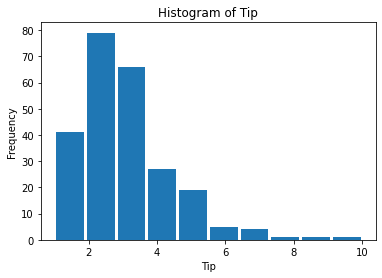

In [22]:
# Histogram of 'tip'
plt.hist(Finaldf.tip,rwidth = 0.9)
plt.title('Histogram of Tip')
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.show()

#### Conclusion:
Tips are usually in the range of 1~5 dollars, rarely reaching more than 5 dollars.

#### Analysis of Tip Rate

In [24]:
# Descriptive Analysis of 'tip_rate'
Finaldf['tip_rate'].describe()

count    244.000000
mean      16.080258
std        6.107220
min        3.563814
25%       12.912736
50%       15.476977
75%       19.147549
max       71.034483
Name: tip_rate, dtype: float64

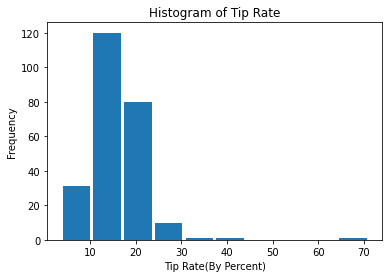

In [25]:
# Histogram of 'tip_rate'
plt.hist(Finaldf.tip_rate,rwidth=0.9)
plt.title('Histogram of Tip Rate')
plt.xlabel('Tip Rate(By Percent)')
plt.ylabel('Frequency')
plt.show()

#### Conclusion:
People are usually willing to give a 10% to 20% tip.

### For Categorical Variables

#### Analysis of Gender

In [26]:
# Typr count of gender of people who pays the bill
SexCnts = DataFrame(Finaldf.sex.value_counts())
SexCnts

,sex
Male,157
Female,87


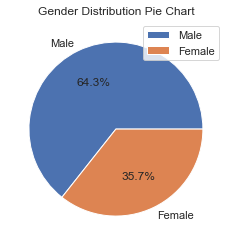

In [100]:
# Pie chart of gender of people who pays the bill
SexCnts.plot(kind='pie',autopct='%1.1f%%',subplots = True)
plt.title('Gender Distribution Pie Chart')
plt.ylabel('')
plt.show()

#### Conclusion:
Of all records, 64.3% of payments were made by male and 35.7% by female.

#### Analysis of Smoke of Not

In [28]:
# Type count of whether people who pays the bill smoke
SmokerCnts = DataFrame(Finaldf.smoker.value_counts())
SmokerCnts

,smoker
No,151
Yes,93


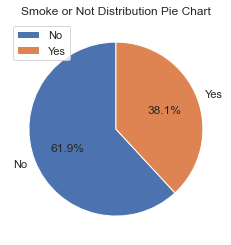

In [99]:
# Pie chart of whether people who pays the bill smoke
SmokerCnts.plot(kind='pie',autopct='%1.1f%%',subplots = True, startangle=90)
plt.title('Smoke or Not Distribution Pie Chart')
plt.ylabel('')
plt.show()

#### Conclusion:
38.1% of person who pays bill are smoker, 61.9% are not.

#### Analysis of Day of the Week

In [30]:
# Type count of day of the week of people come to the restaurant
DayCnts = DataFrame(Finaldf.day.value_counts())
DayCnts

,day
Sat,87
Sun,76
Thur,62
Fri,19


<AxesSubplot:>

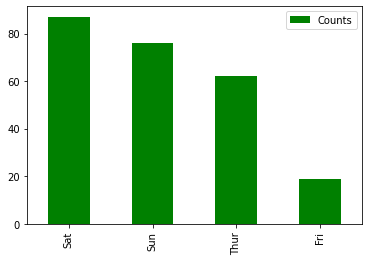

In [31]:
# Histogram of day of week
DayCnts.columns = ['Counts']
DayCnts.plot(kind = 'bar', color = 'green')

#### Conclusion:
Saturday has the most dining records, then Sunday, Thursdat, Friday.

#### Analysis of Dining Time

In [32]:
# Type count of dining time
TimeCnts = DataFrame(Finaldf.time.value_counts())
TimeCnts

,time
Dinner,176
Lunch,68


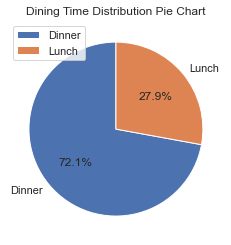

In [98]:
TimeCnts.plot(kind='pie',autopct='%1.1f%%',subplots = True, startangle=90)
plt.title('Dining Time Distribution Pie Chart')
plt.ylabel('')
plt.show()

#### Conclusion:
72.1% dining record are dinner, 27.9% are lunch.

### Summaries

#### Heatmap of Continuous Variables

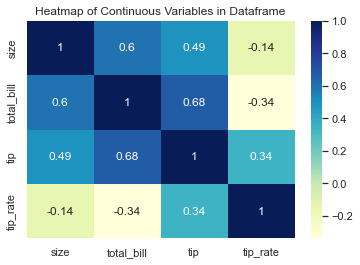

In [103]:
Finaldf[['size','total_bill','tip','tip_rate']]
sns.heatmap(Finaldf.corr(),annot=True,cmap='YlGnBu')
plt.title('Heatmap of Continuous Variables in Dataframe')
plt.show()

#### Conclusion:
From heatmap, we can see that total bill and tip has a relatively high positive correlation, total bill and tip rate has a relatively high negative correlation. The higher the total bill, the higher the tip, and the lower tip rate. \
Then I generate a 1x2 subplot of scatterplot to see this two relationship.

#### 1x2 Subplot of Scatterplot

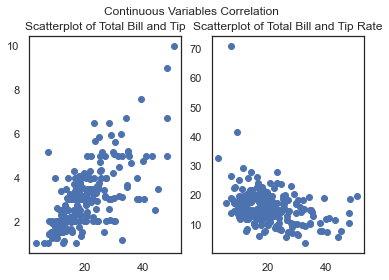

In [106]:
plt.suptitle('Continuous Variables Correlation',fontsize='12')
plt.subplots_adjust(hspace=.5)

plt.subplot(1, 2, 1)
plt.scatter(Finaldf['total_bill'],Finaldf['tip'])
plt.title('Scatterplot of Total Bill and Tip')
plt.ylabel=('tip')

plt.subplot(1, 2, 2)
plt.scatter(Finaldf['total_bill'],Finaldf['tip_rate'])
plt.title('Scatterplot of Total Bill and Tip Rate')
plt.ylabel=('tip_rate')

plt.show()

#### Discussion
We performed more detailed analysis of continuous type variables. In the data set, most of the people who dined at the restaurant were two people, spending around 20 dollars, and tipping rates ranged from about 10 persent to 20 persent, that is 1~5 dollars. \
Total bill has positive correlation to tip, size, negative correlation to tip rate. Tip has positve correlation with size, tip rate. Tip rate has negative correlation to size. However, due to the limited amount of data, the reliability of these results requires further analysis. \
Meanwhile, more analysis is needed for qualitative data.

### My Research Questions

#### 1. Whether certain characteristics of the payer affect the tip rate？

sex
Female    16.649074
Male      15.765055
Name: tip_rate, dtype: float64

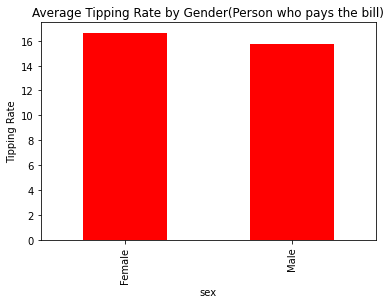

In [34]:
tr_Gender = Finaldf.groupby("sex")["tip_rate"].mean()
tr_Gender.plot(kind='bar',color='red')
plt.title('Average Tipping Rate by Gender(Person who pays the bill)')
plt.ylabel('Tipping Rate')
tr_Gender

smoker
No     15.932846
Yes    16.319604
Name: tip_rate, dtype: float64

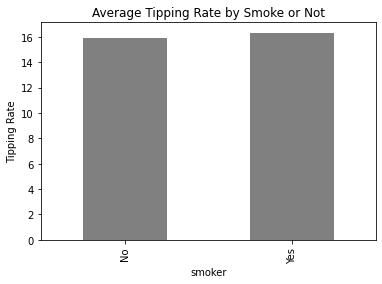

In [54]:
tr_smoke = Finaldf.groupby("smoker")["tip_rate"].mean()
tr_smoke.plot(kind='bar',color='grey')
plt.title('Average Tipping Rate by Smoke or Not')
plt.ylabel('Tipping Rate')
tr_smoke

#### Conclusion:
The dataset provides two payer characteristics: gender and whether or not they smoke. These characteristics are available in sufficient quantities to support the analysis. After analyzing the average of tip rates, female payers gave nearly 1% higher tips than male payers. Smokers gave slightly higher tip rates than non-smokers, less than 0.5%. It can be assumed that the gender trait of the payer has an affects on tip rate.

#### 2. Which day and time has the highest total bill, and which has the highest tip rate? Are they the same?

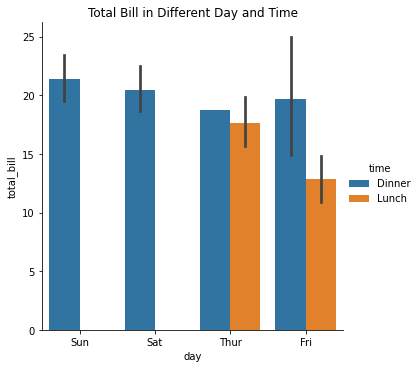

In [73]:
sns.catplot(x='day',y='total_bill', kind = "bar", data=Finaldf,hue='time')
plt.title('Total Bill in Different Day and Time')
plt.show()

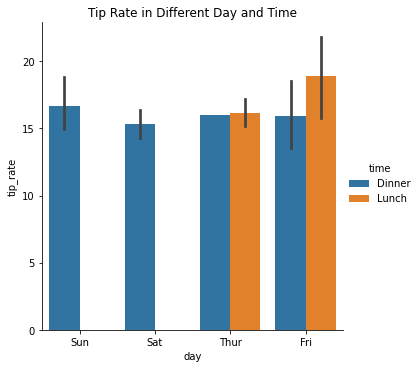

In [70]:
sns.catplot(x='day',y='tip_rate', kind = "bar", data=Finaldf,hue='time')
plt.title('Tip Rate in Different Day and Time')
plt.show()

#### Conclusion:
Sunday dinner has the highest average bill amount, but the tip rate is not the highest. Friday lunch has the highest tip rate. However, the dining records on Friday are smaller than those on Thursday, Saturday and Sunday, so the results may be biased.

#### 3. How's size of people dining affact the tip rate? Does the size of people dining really has an affact the tip rate?

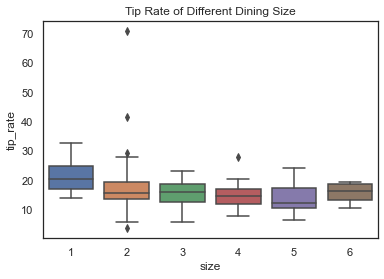

In [91]:
sns.boxplot(x="size", y="tip_rate", data=Finaldf) 
plt.title('Tip Rate of Different Dining Size')
plt.show() 

#### Conclusion:
Tipping rates for 2, 3 and 4 diners do not differ much, while tipping rates for 1 diner are higher and tipping rates for 5 diners are lower. However, combined with the previous data analysis, the data sample of 1 and 5 diners is very small, less than 20, so it may produce a large bias.

### Conclusion
Based on all the analysis generated above, I'd like to make a conclusion of tippint situation in the restaurant. \
Firstly, for payer characteristics. The dataset recorded two payer characteristics, gender and whether or not they smoked. The percentage of male payers is higher than that of female, and the percentage of non-smoking payers is higher than that of smokers. Gender affects tipping rates, with female payers paying higher rates and smoking or not having little to no effect on tipping rates. \
Secondly, for other characteristics of the record, the day of the week, lunch or dinner, and the number of people eating. Saturday has the most dining records, then Sunday, Thursdat, Friday. More dinners were recorded, and no lunches were even recorded on Saturdays and Sundays. Friday lunch has the highest average tip rate and Sunday dinner has the highest average amount. Most of the meals are served to 2 people. Other meal numbers, such as 1 person, 5 people, etc. were recorded too infrequently to determine if there was a negative correlation between meal numbers and tip rates. \
Finally, for total bill, tip and tip rate I generated. The total amount has a positive correlation with the tip amount and a negative correlation with the tip rate. \
For operators, they should prepare locations equally for different sizes of the dining population, and also many prepare some locations for two people. Focus on Saturday and Sunday operations, especially for dinner time, given that Saturday records the most meals, while Sunday has a higher average meal amount. Perhaps, those who value female payers might get more tips.